###  <font color='green' size=5> Term Project #2: Analysis of Customer Churn
</font> 

**Customer Analytics** <br>
**ANLT 274** <br>
**November 10, 2018** <br>
<br>

<font color='green' size=4> By: Ali Taheri</font>

At this project, we will analyze the dataset of costomer churn in a telecommunicaton service provider. Stakeholder likes to know affecting attributes that have considerable contribution on chance of customer churn.

In [277]:
# Import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import warnings
import timeit

import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

from IPython.display import display
pd.options.display.max_columns = None

import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

# Exploratory Analysis

In [278]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(df.shape)

df.head(5)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [279]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


At first, we loaded dataset in  pandas dataframe. This datset has about 7000 observations for customers with 21 attributes. We Remove non-required attributes at first same to customerID.

In [280]:
df=df.drop('customerID',axis=1)

In [281]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

We could see out of dataset is imbalanced and we need to balance it.

In [282]:
df=df.loc[df['TotalCharges'] != ' ',:]

l=list(range(0,len(df.columns)))
l.remove(4)
l.remove(17)
l.remove(18)

for col_num in l:
    df.iloc[:,col_num]=df.iloc[:,col_num].astype('category')
    print(df.iloc[:,col_num].value_counts())

df['TotalCharges']=df['TotalCharges'].astype(float)


Male      3549
Female    3483
Name: gender, dtype: int64
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
No     3639
Yes    3393
Name: Partner, dtype: int64
No     4933
Yes    2099
Name: Dependents, dtype: int64
Yes    6352
No      680
Name: PhoneService, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
No                     2809
Yes                

In [283]:
df.groupby('Churn').mean()

,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.650010,61.307408,2555.344141
Yes,17.979133,74.441332,1531.796094


Above table shows that customers with lower value of tenure and higher monthly charges are more likely to churn.

Text(0, 0.5, 'Frequency of Churn')

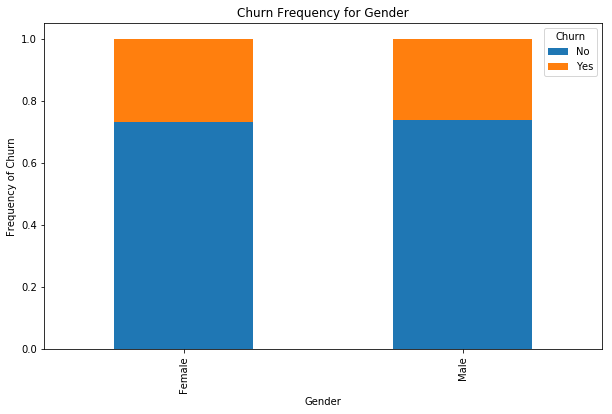

In [284]:
pd.crosstab(df['gender'],df['Churn']).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar',stacked=True)
plt.title('Churn Frequency for Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Churn')

Above bar chart shows that gender does not have considerable effect on customer churn.

Text(0, 0.5, 'Frequency of Churn')

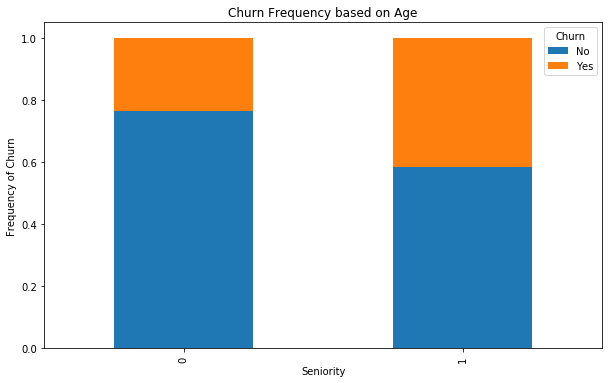

In [285]:
pd.crosstab(df['SeniorCitizen'],df['Churn']).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar',stacked=True)
plt.title('Churn Frequency based on Age')
plt.xlabel('Seniority')
plt.ylabel('Frequency of Churn')

This graph shows that higher percentage of senior customers churn.

Text(0, 0.5, 'Frequency of Churn')

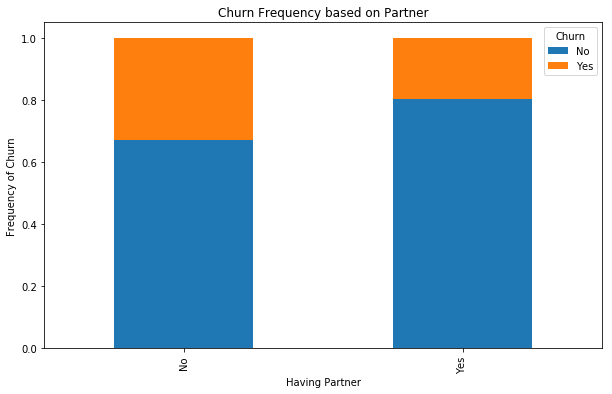

In [286]:
pd.crosstab(df['Partner'],df['Churn']).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar',stacked=True)
plt.title('Churn Frequency based on Partner')
plt.xlabel('Having Partner')
plt.ylabel('Frequency of Churn')

This graph proves that people without partner are more likely to churn.

Text(0, 0.5, 'Frequency of Churn')

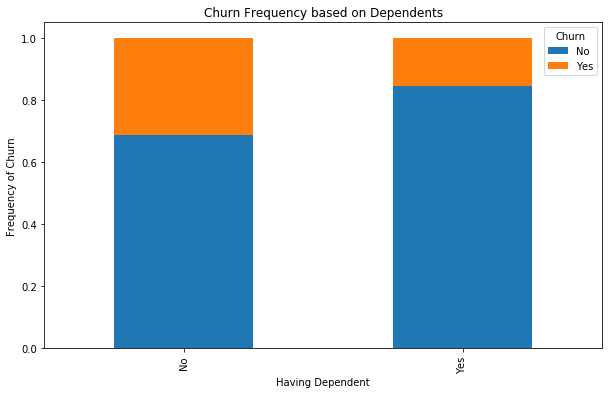

In [287]:
pd.crosstab(df['Dependents'],df['Churn']).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar',stacked=True)
plt.title('Churn Frequency based on Dependents')
plt.xlabel('Having Dependent')
plt.ylabel('Frequency of Churn')

This bar chart shows chance of churn for customers with dependent is lower than customers without dependent.

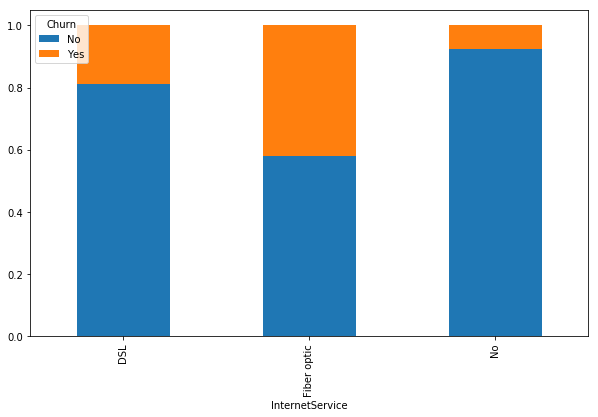

In [288]:
df.pivot_table(index='InternetService', columns='Churn', values='tenure', aggfunc='count'). \
apply(lambda r: r/r.sum(), axis=1).plot.bar(stacked=True)

Customers without internet have more loyalty. Additionality, customers with fiber optic service are more likely to churn than customers with DSL.

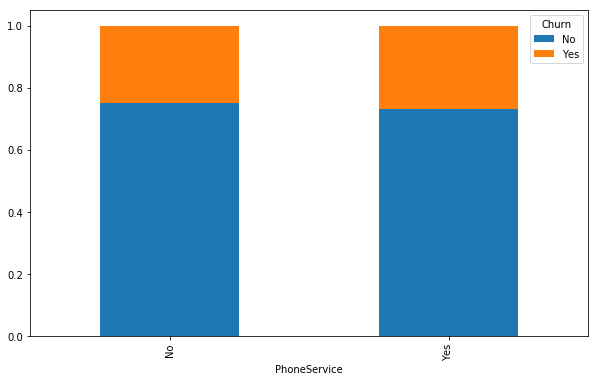

In [289]:
df.pivot_table(index='PhoneService', columns='Churn', values='tenure', aggfunc='count').\
apply(lambda r: r/r.sum(), axis=1).plot.bar(stacked=True)

This bar chart shows that having phone service does not have any affect on customer churn.

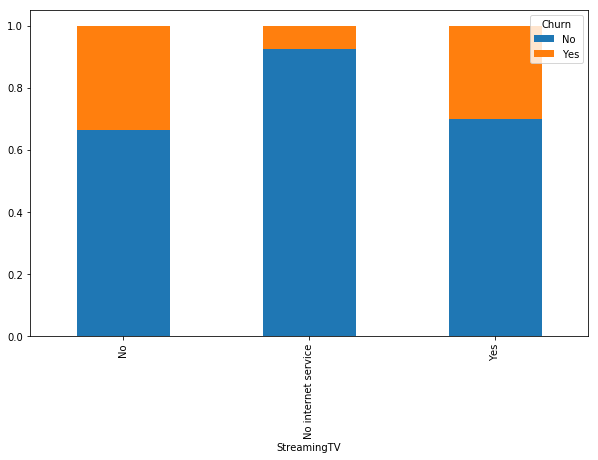

In [290]:
df.pivot_table(index='StreamingTV', columns='Churn', values='tenure', aggfunc='count').\
apply(lambda r: r/r.sum(), axis=1).plot.bar(stacked=True)

Above graph shows this service does not affect customer churn.

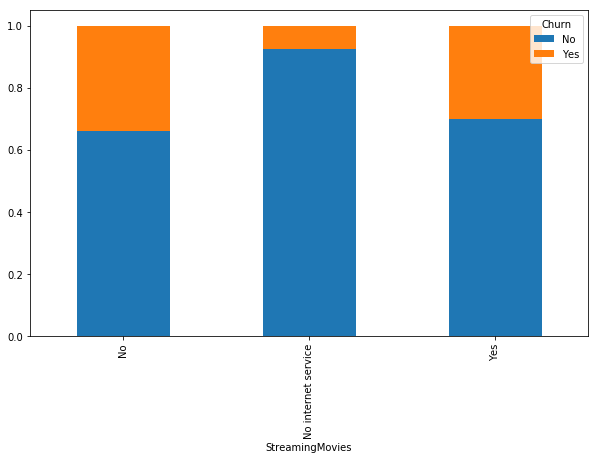

In [291]:
df.pivot_table(index='StreamingMovies', columns='Churn', values='tenure', aggfunc='count').\
apply(lambda r: r/r.sum(), axis=1).plot.bar(stacked=True)

Streaming of Movies does not have any relation with customer churn.

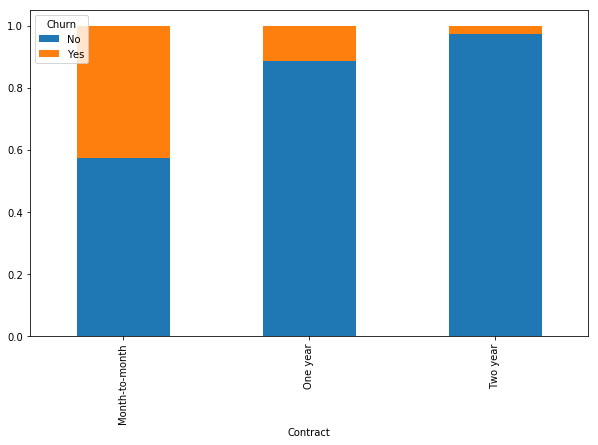

In [292]:
df.pivot_table(index='Contract', columns='Churn', values='tenure', aggfunc='count').\
apply(lambda r: r/r.sum(), axis=1).plot.bar(stacked=True)

Above bar chart has valuable information. Duration of contract has negative correlaton with chance of churn by customer.

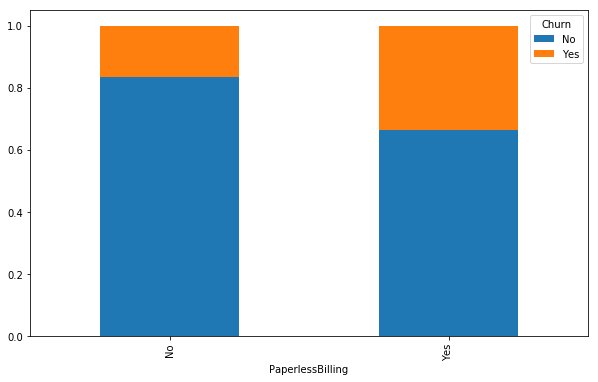

In [293]:
df.pivot_table(index='PaperlessBilling', columns='Churn', values='tenure', aggfunc='count').\
apply(lambda r: r/r.sum(), axis=1).plot.bar(stacked=True)

It is interesting old fashioned clients are less likely to churn.

# Data Preparation

In [294]:
df['gender']=df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['Partner']=df['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Dependents']=df['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)
df['PhoneService']=df['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)
df['PaperlessBilling']=df['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Churn']=df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

We changed values of binary attributes to 0 and 1.

In [295]:
cat_vars=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',\
          'StreamingTV','StreamingMovies','Contract','PaymentMethod']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df=df.join(cat_list)
#cat_vars=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',\
 #         'StreamingTV','StreamingMovies','Contract','PaymentMethod']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

In above cell, we applied one-hot encoding to non-binary categorical variables.

In [296]:
data_final=df[to_keep]
data_final.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
      

In [297]:
data_final.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


Now, we try to find correlated attributes.

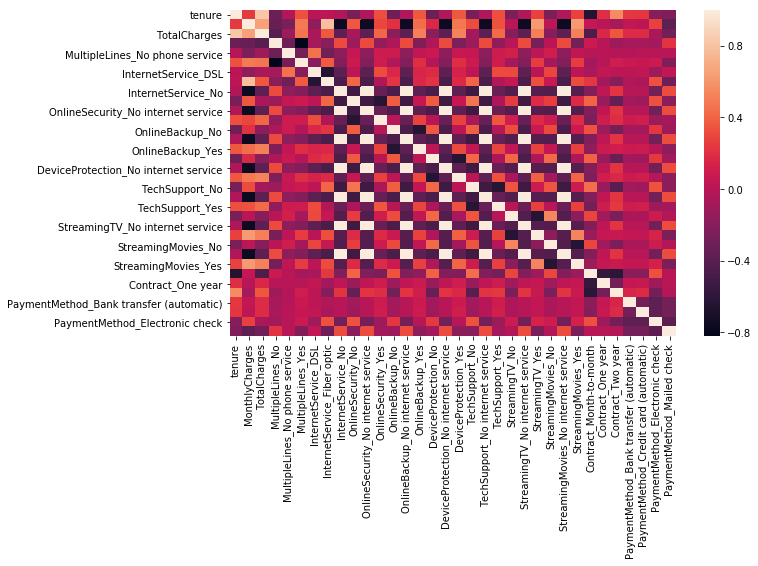

In [307]:
sns.heatmap(data_final.corr())

In [309]:
data_final.drop(['InternetService_No', 'OnlineSecurity_No internet service', \
                 'OnlineBackup_No internet service', 'DeviceProtection_No internet service',\
                 'TechSupport_No internet service','StreamingTV_No internet service',\
                  'StreamingMovies_No internet service'], axis=1,inplace=True)

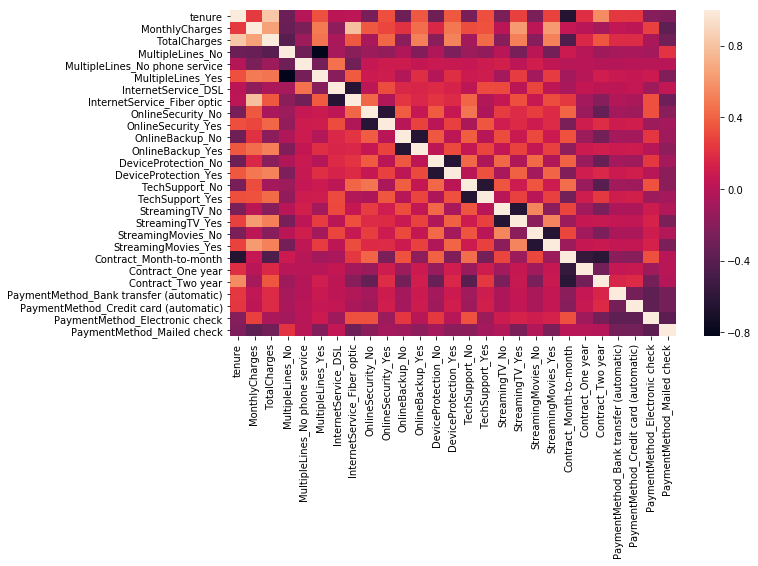

In [311]:
sns.heatmap(data_final.corr())

We removed correlated attributes and data is ready for analysis.

# Over sampling due to imbalanced dataset

In following cell, we do Over-sampling using SMOTE for balancing our dataset with following properties: <br> <br>
1- Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies. <br>
<br>
2- Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [371]:
warnings.filterwarnings("ignore")
X = data_final.loc[:, data_final.columns != 'Churn']
y = data_final.loc[:, data_final.columns == 'Churn']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no-churn in oversampled data",len(os_data_y[os_data_y['Churn']==0]))
print("Number of churn",len(os_data_y[os_data_y['Churn']==1]))
print("Proportion of no-churn data in oversampled data is ",len(os_data_y[os_data_y['Churn']==0])/len(os_data_X))
print("Proportion of churn data in oversampled data is ",len(os_data_y[os_data_y['Churn']==1])/len(os_data_X))

length of oversampled data is  8250
Number of no-churn in oversampled data 4125
Number of churn 4125
Proportion of no-churn data in oversampled data is  0.5
Proportion of churn data in oversampled data is  0.5


# Recursive Feature Elimination

In [372]:
warnings.filterwarnings("ignore")
data_final_vars=data_final.columns.values.tolist()
y=['Churn']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 12)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False  True False False  True False False False False False
  True  True  True False  True False False False  True False False False
 False False  True  True  True  True  True False False]
[15 10 21  1 17  2  1 20 22 16  3 19  1  1  1  6  1  8  9 12  1 18 14  7
 13  4  1  1  1  1  1  5 11]


In above cell, we did feature selection.

# Final attributes for modeling

In [373]:
#In above cell, we did feature selection.

cols=[]
for i in range(len(X)):
    if rfe.support_[i]:
        cols.append(X[i])
        
X=os_data_X[cols]
X_test=X_test[cols]
y=os_data_y['Churn']
print(cols)

['Dependents', 'PaperlessBilling', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No', 'TechSupport_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)']


# Logistic Regression

In [363]:
model = LogisticRegression()
logreg = model.fit(X, y)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print()
from sklearn.metrics import confusion_matrix
confusion_matrix_LR = confusion_matrix(y_test, y_pred)
print(confusion_matrix_LR)

Accuracy of logistic regression classifier on test set: 0.74

[[738 300]
 [ 72 297]]


Accuracy of logistic Regression is 74%.

In [364]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.490020
         Iterations 7
                                     Results: Logit
Model:                      Logit                    Pseudo R-squared:         0.293    
Dependent Variable:         Churn                    AIC:                      8109.3224
Date:                       2018-12-04 16:31         BIC:                      8193.5381
No. Observations:           8250                     Log-Likelihood:           -4042.7  
Df Model:                   11                       LL-Null:                  -5718.5  
Df Residuals:               8238                     LLR p-value:              0.0000   
Converged:                  1.0000                   Scale:                    1.0000   
No. Iterations:             7.0000                                                      
----------------------------------------------------------------------------------------
                                         Coef

In [365]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1038
           1       0.50      0.80      0.61       369

   micro avg       0.74      0.74      0.74      1407
   macro avg       0.70      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



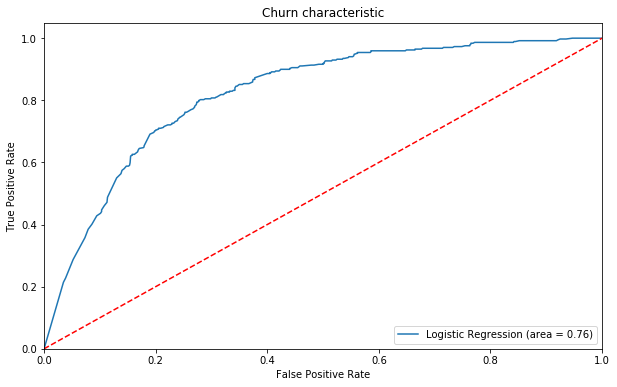

In [366]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Churn characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Random Forest

In [374]:
train_features=np.array(X)
train_labels=np.array(y)

test_features=np.array(X_test)
test_labels=np.array(y_test)


In [375]:
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators = 30, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

print('Accuracy of Random Forest classifier on test set: {:.2f}'.\
      format(round(accuracy_score(test_labels, predictions),2)))

print()

confusion_matrix_RF = confusion_matrix(test_labels, predictions)
print(confusion_matrix_RF)

Accuracy of Random Forest classifier on test set: 0.77

[[871 167]
 [153 216]]


It shows that random forest does not give us a great improve.

# Conclusion

As we could see from models, having dependent, type of billing, type of internet service, type of contract and services of backup, security and tech support are more important attribute about customer churn.